In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [6]:
import sqlite3

conn = sqlite3.connect('Cantones.db')

provincias_cercanas = [
    18, 6, 5, 13, 12, 17, 23
]

#Load the entire dataset
df_hogar = pd.read_csv(
    '/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Proyecto FDS/data/raw/hogar_cant.csv', sep=';'
)

# #Filter the dataset to only include the provinces of interest
df_hogar = df_hogar[df_hogar['I01'].isin(provincias_cercanas)]

#Display basic information
print(df_hogar.info())
print(df_hogar.describe())
print(df_hogar.shape)

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_34502/336565824.py:10: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hogar = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
Index: 2381224 entries, 434069 to 5087417
Data columns (total 44 columns):
 #   Column    Dtype  
---  ------    -----  
 0   I01       int64  
 1   I02       int64  
 2   I10       float64
 3   INH       int64  
 4   H01       float64
 5   H02       float64
 6   H03       float64
 7   H04       float64
 8   H05       float64
 9   H06       float64
 10  H0701     float64
 11  H0702     float64
 12  H0703     float64
 13  H0801     float64
 14  H0801N    float64
 15  H0802     float64
 16  H0802N    float64
 17  H09       float64
 18  H1001     float64
 19  H1002     float64
 20  H1003     float64
 21  H1004     float64
 22  H1005     float64
 23  H1006     float64
 24  H1007     float64
 25  H1008     float64
 26  H1009     float64
 27  H1010     float64
 28  H1011     float64
 29  H1012     float64
 30  H11       float64
 31  H1101     float64
 32  H12       float64
 33  H1201     float64
 34  H1301     int64  
 35  H1302     int64  
 36  H1303   

In [7]:
dtype_counts = df_hogar.dtypes.value_counts()
print(dtype_counts)

float64    33
int64      10
object      1
Name: count, dtype: int64


In [8]:
#We count nulls per column
missing_values_df_hogar = df_hogar.isnull().sum().sort_values(ascending=False)
print(missing_values_df_hogar)

H1201       2340868
H1101       2276356
H0802N      1758342
H0801N      1096218
H1008          1726
H1003          1726
H1004          1726
H1006          1726
H1007          1726
H1005          1726
H1009          1726
H1002          1726
H1011          1726
H1012          1726
H11            1726
H12            1726
H1010          1726
H1001          1726
H05            1726
H01R           1726
H0802          1726
H0801          1726
H0703          1726
H0702          1726
H0701          1726
H06            1726
H09            1726
H04            1726
H03            1726
H02            1726
H01            1726
CANTON            0
H15               0
ID_HOG            0
ID_VIV            0
AUR               0
I01               0
H1303             0
H1302             0
H1301             0
I02               0
INH               0
I10               0
IMP_VOPA          0
dtype: int64


In [9]:
#As with the vivienda dataset, we rename the columns to make them more readable
columns_renaming = {
    'I01': 'provincia',
    'I02': 'canton_id',
    'I10': 'nro_vivienda',
    'INH': 'nro_hogar',
    'H01': 'nro_dormitorios',
    'H02': 'espacio_cocina',
    'H03': 'tiene_inodoro',
    'H04': 'tiene_ducha',
    'H05': 'combustible_cocina',
    'H06': 'fuente_agua_bebida',
    'H0701': 'separa_basura_organica',
    'H0702': 'separa_basura_animales',
    'H0703': 'separa_basura_reciclaje',
    'H0801': 'tiene_perros',
    'H0801N': 'nro_perros',
    'H0802': 'tiene_gatos',
    'H0802N': 'nro_gatos',
    'H09': 'tenencia_vivienda',
    'H1001': 'tiene_telefono_fijo',
    'H1002': 'tiene_celular',
    'H1003': 'tiene_tv_pagada',
    'H1004': 'tiene_internet',
    'H1005': 'tiene_computadora',
    'H1006': 'tiene_refrigeradora',
    'H1007': 'tiene_lavadora',
    'H1008': 'tiene_secadora',
    'H1009': 'tiene_microondas',
    'H1010': 'tiene_extractora_olores',
    'H1011': 'tiene_auto',
    'H1012': 'tiene_moto',
    'H11': 'fallecidos_ultimos_3_anios',
    'H1101': 'nro_fallecidos',
    'H12': 'emigrantes_desde_2010',
    'H1201': 'nro_emigrantes',
    'H1301': 'total_hombres',
    'H1302': 'total_mujeres',
    'H1303': 'total_personas',
    'H15': 'persona_no_mencionada',
    'AUR': 'zona',
    'CANTON': 'canton',
    'ID_VIV': 'id_vivienda',
    'ID_HOG': 'id_hogar',
    'H01R': 'nro_dormitorios_r',
    'IMP_VOPA': 'registro_imputado'
}

df_hogar_renamed = df_hogar.rename(columns=columns_renaming)
df_hogar_renamed.info()
df_hogar_renamed.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2381224 entries, 434069 to 5087417
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   provincia                   int64  
 1   canton_id                   int64  
 2   nro_vivienda                float64
 3   nro_hogar                   int64  
 4   nro_dormitorios             float64
 5   espacio_cocina              float64
 6   tiene_inodoro               float64
 7   tiene_ducha                 float64
 8   combustible_cocina          float64
 9   fuente_agua_bebida          float64
 10  separa_basura_organica      float64
 11  separa_basura_animales      float64
 12  separa_basura_reciclaje     float64
 13  tiene_perros                float64
 14  nro_perros                  float64
 15  tiene_gatos                 float64
 16  nro_gatos                   float64
 17  tenencia_vivienda           float64
 18  tiene_telefono_fijo         float64
 19  tiene_celular        

nro_emigrantes                2340868
nro_fallecidos                2276356
nro_gatos                     1758342
nro_perros                    1096218
tiene_secadora                   1726
tiene_tv_pagada                  1726
tiene_internet                   1726
tiene_refrigeradora              1726
tiene_lavadora                   1726
tiene_computadora                1726
tiene_microondas                 1726
tiene_celular                    1726
tiene_auto                       1726
tiene_moto                       1726
fallecidos_ultimos_3_anios       1726
emigrantes_desde_2010            1726
tiene_extractora_olores          1726
tiene_telefono_fijo              1726
combustible_cocina               1726
nro_dormitorios_r                1726
tiene_gatos                      1726
tiene_perros                     1726
separa_basura_reciclaje          1726
separa_basura_animales           1726
separa_basura_organica           1726
fuente_agua_bebida               1726
tenencia_viv

In [10]:
df_hogar_renamed.duplicated().sum()

0

- There are no duplicates in the dataset
- The nulls in some columns have consistent numbers, which will need further exploration
- There are integer values that will have to be transformed to numeric

In [11]:
df_hogar_renamed[['total_personas', 'total_mujeres', 'total_hombres']].describe()

,total_personas,total_mujeres,total_hombres
count,2.381224e+06,2.381224e+06,2.381224e+06
mean,3.183073e+00,1.636246e+00,1.546826e+00
std,3.676986e+00,1.148953e+00,3.204871e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.000000e+00,2.000000e+00,2.000000e+00
max,4.144000e+03,4.970000e+02,3.647000e+03


CONCLUSIONES: 
- El promedio de personas por hogar es un poco más que 3 personas
- La distribución por género parece balanceada, con una pequeña inclinación a que hay más mujeres. 
- La desviación standard nos dice que el número de personas por hogar varía altamente. El número de mujeres en el hogar es más consistente que el de los hombres, puede que por migración interna o externa o simplemente desplazamiento por trabajo. 
- Parece haber outliers bastante altos, este será el siguiente paso para identificarlos. 


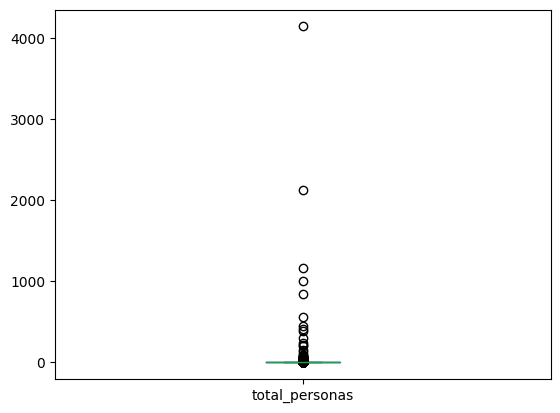

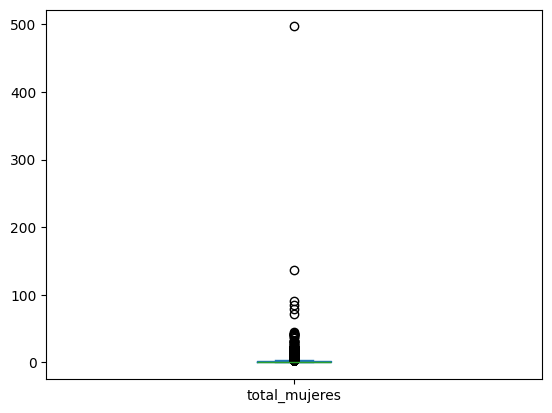

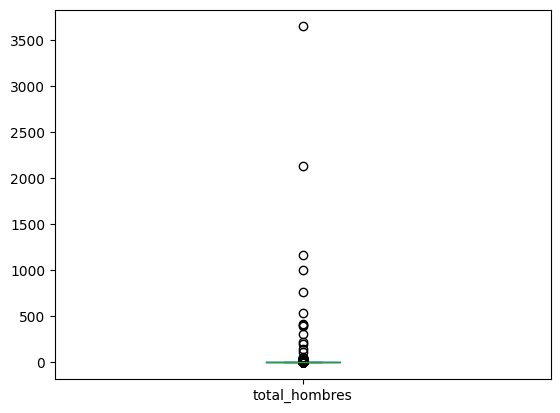

In [12]:
#Now we want to analyse the outliers in the household distribution 
df_hogar_renamed['total_personas'].plot(kind='box')
plt.show()

df_hogar_renamed['total_mujeres'].plot(kind='box')
plt.show()

df_hogar_renamed['total_hombres'].plot(kind='box')
plt.show()

Los outliers son muy altos, quizá esto indique que las viviendas son colectivas o de otro tipo no personal. 

Debido a que esta es la información de todas las provincias, agregadas, vamos a analizar lso mismos datos pero por provincia.

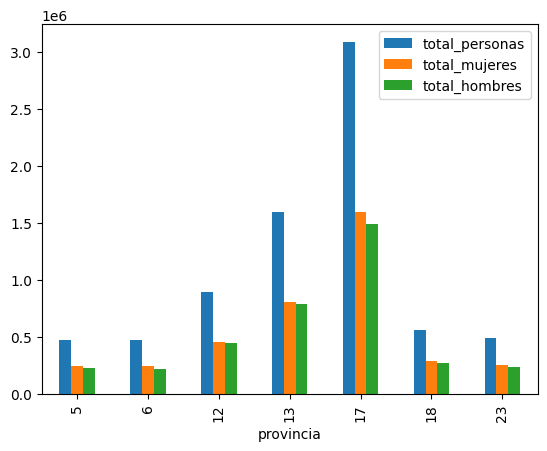

In [13]:
#We will analyze the distribution of total personas, mujeres y hombres por provincia. 
personas_por_provincia = df_hogar_renamed.groupby('provincia', as_index=False)[['total_personas', 'total_mujeres', 'total_hombres']].sum()
personas_por_provincia.plot(kind='bar', x='provincia', y=['total_personas', 'total_mujeres', 'total_hombres'])
plt.show()

Vemos que la provincia más poblada es la de Pichincha, seguida por la de Manabí. 